# Introduction
By: Lucy Hu, Sean McGeehan, James Baker

For our project we focused on classifying toxicity using syntax and semantic features. We trained several machine learning models ranging from simple Bag of Words models using tf-idf up to fine tuning a BERT base model.

## Motivation
The introduction of widespread Internet access and the age of social media has allowed for much more communication, interaction, and information sharing than ever before. Users are able to engage with far-away family, friends, and even strangers from the comfort of their own home. While social media has no doubt brought greater convenience and connection into our lives, its potential negative consequences on mental health, social abilities, and more cannot be ignored. In fact, they are the subject of much concern today, as evidenced by numerous [articles](https://www.wsj.com/articles/smarter-healthier-social-media-choices-11639177212) and [studies](https://www.pewresearch.org/fact-tank/2020/10/15/64-of-americans-say-social-media-have-a-mostly-negative-effect-on-the-way-things-are-going-in-the-u-s-today/) published on the subject. 


Unfortunately, social media can be abused as a platform for creating and sharing offensive and toxic content like hate speech. As a result, comment moderation has become increasingly important especially considering the far reaching impacts of social media. [Studies](https://www.pewresearch.org/internet/fact-sheet/social-media/) [conducted](https://www.pewresearch.org/internet/fact-sheet/social-media/) by the Pew Research Center suggest that at least 72% of the public uses some form of social media and the majority of users access these platforms on a daily basis. Even more distressing, many of the most prolific users are young adults or adolescents. Hate speech and other forms of offensive content can potentially inflict mental and physical harm on users, especially vulnerable groups. 

Given the importance of this problem, we decided to explore toxicity classification for our project. 

## Data and Definition
Our dataset originates from the [Jigsaw Unintended Bias in Toxicity Classification competition](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data?select=train.csv) on Kaggle. It consists of 1.8 million comments which were gathered from various Wikipedia Talk pages and labeled by a panel of reviewers. A target toxicity label was generated by aggregating the ratings of all judges, where toxicity was defined by researchers as "anything rude, disrespectful or otherwise likely to make someone leave a discussion."

The table below includes examples of comments that were classified as non-toxic and toxic:


| Comment                                                                                                                                        | Classification |
|------------------------------------------------------------------------------------------------------------------------------------------------|----------------|
| Thank you!! This would make my life a lot less anxiety-inducing. Keep it up, and don't let anyone get in your way!                             | Non-toxic      |
| This is such an urgent design problem; kudos to you for taking it on. Very impressive!                                                         | Non-toxic      |
| please spare us your strawman drivel that is void of intelligence. Impeding traffic causing accidents has nothing to do with being in a hurry. | Toxic          |
| For some of these demonic possessed brats, a straitjacket would be the least restrictive appropriate educational setting.                      | Toxic          |

## Hypothesis

We define the null hypothesis as a non-significant correlation between comment contents and offensive rating. Our machine learning model rejects the null hypothesis by learning a model with a set of heuristics and comment attributes as inputs and offensiveness label (True or False) as the output. As shown below, such a model exists and operates through various methods, including but not limited to Deep Learning Transformers, Logistic Regression, and Random Forest.

## Summary of Approach

We approached this task first by cleaning our data and generating a binary toxicity label before conducting some exploratory data analysis. Based on our results, we began to generate potential features such as Bag of Words (e.g. tf-idf), word embedding using Word2vec, a count of George Carlin's list of offensive words, stopwords, sentence length and count, comma count, social justice buzzwords, reading level, and more. We explored using logistic regression, xgboost, and pretrained roBERTa models as well as fine tuning our own BERT and roBERTa models. 

#Import Spacy data for Word2vec
Run the following cell at the beginning of the notebook, then reset runtime and do not run again.

In [1]:
# Spacy setup -- reset notebook after running this cell
! python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9 MB 1.2 MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-py3-none-any.whl size=829180942 sha256=2f9dfcfc47ecc307b8cbc1afef2d27d87f5fc176a4647619ee6697870e427119
  Stored in directory: /tmp/pip-ephem-wheel-cache-ox9oifpw/wheels/11/95/ba/2c36cc368c0bd339b44a791c2c1881a1fb714b78c29a4cb8f5
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


# Imports and Preparing Data

Importing Pandas and NLTK

In [2]:
# Import basic libraries

import pandas as pd
import numpy as np

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

Import data

In [3]:
# Download data
!apt update
!apt install gcc python-dev libkrb5-dev
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='163YCf74tmFDeN_vy64Ta_VgAZwTddqoo',
                                    dest_path='/content/train.csv')

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:13 

In [4]:
# Importing data
df = pd.read_csv('/content/train.csv', error_bad_lines=False) 
df

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,black,buddhist,christian,female,heterosexual,hindu,homosexual_gay_or_lesbian,intellectual_or_learning_disability,jewish,latino,male,muslim,other_disability,other_gender,other_race_or_ethnicity,other_religion,other_sexual_orientation,physical_disability,psychiatric_or_mental_illness,transgender,white,created_date,publication_id,parent_id,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-29 10:50:41.987077+00,2,NaN,2006,rejected,0,0,0,0,0,0.0,0,4
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-29 10:50:42.870083+00,2,NaN,2006,rejected,0,0,0,0,0,0.0,0,4
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-29 10:50:45.222647+00,2,NaN,2006,rejected,0,0,0,0,0,0.0,0,4
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-29 10:50:47.601894+00,2,NaN,2006,rejected,0,0,0,0,0,0.0,0,4
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.000000,0.021277,0.872340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-09-29 10:50:48.488476+00,2,NaN,2006,rejected,0,0,0,1,0,0.0,4,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1804869,6333967,0.000000,"Maybe the tax on ""things"" would be collected w...",0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-11 00:55:39.265997+00,54,6332382.0,399385,approved,0,0,0,0,0,0.0,0,4
1804870,6333969,0.000000,What do you call people who STILL think the di...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-11 00:55:56.634498+00,54,6333871.0,399528,approved,0,0,0,0,0,0.0,0,4
1804871,6333982,0.000000,"thank you ,,,right or wrong,,, i am following ...",0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-11 00:59:02.840713+00,54,NaN,399457,approved,0,0,0,0,0,0.0,0,4
1804872,6334009,0.621212,Anyone who is quoted as having the following e...,0.030303,0.030303,0.045455,0.621212,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-11 01:01:10.153692+00,13,6333833.0,399519,approved,0,0,0,0,0,0.0,0,66


Here we clean the imported dataframe. In order to create models that would be more applicable to other data sources (e.g. social media comments gathered from Twitter, Reddit, Youtube, etc.), we decided to focus only on toxicity and dropped the majority of other columns, which contained data which would not be as readily available from other sources (i.e. labels for obscenity, threats, commenter identities, etc.). 

In [5]:
# Data cleaning
df = df.dropna(axis = 1) # drop NA values
df= df.drop(columns = ['severe_toxicity', 'obscene', 'identity_attack', 
                                    'insult', 'threat', 'created_date', 'publication_id', 
                                    'article_id', 'rating', 'funny', 'wow', 'sad', 'likes', 
                                    'disagree', 'sexual_explicit', 'identity_annotator_count', 
                                    'toxicity_annotator_count'])

To better understand the distribution of our data, we looked at the number of values considered toxic by target thresholds of 0, 0.1, 0.25, 0.5, 0.75, and 1.0. As seen below, there are far more non-toxic comments than toxic comments in this dataset. Using a 0.5 threshold would mark only ~8% of comments as toxic.

In [6]:
total = len(df)
thresholds = [0, 0.1, 0.25, 0.5, 0.75, 1]

print("total:", total)
for x in thresholds:
  if x == 0:
    count = len(df[df["target"] > 0])
  else: 
    count = len(df[df["target"] >= x])
  print(x, "threshold:", count, "ratio:", count / total)
                   

total: 1804874
0 threshold: 540110 ratio: 0.2992508064274847
0.25 threshold: 268615 ratio: 0.14882756358615615
0.5 threshold: 144334 ratio: 0.0799690172277954
0.75 threshold: 38368 ratio: 0.021257993632796526
1 threshold: 4406 ratio: 0.0024411676382949726


Next, we generate a binary label to mark whether a comment is toxic or not. We set the threshold as 0.1 so that comments that were considered toxic by at least 10% of reviewers are marked as toxic in our dataset (roughly 30% of the comments). This gives us reasonable assurance that any comment that is remotely toxic will be considered as such in our models. It also insures that we have enough data to avoid having a high bias low variance data set with class imbalance.



In [7]:
### Data wrangling
# Create labels based on target threshold
df["label"] = df["target"].apply(lambda x : 1 if x > 0.1 else 0)


Here, we down sample our data to create smaller datasets for model testing purposes and also create a 80/20 train test split. 

In [8]:
from sklearn.model_selection import train_test_split
df_small = df.sample(frac=.01, random_state=5)
df_train_sm, df_test_sm = train_test_split(df_small, test_size = .2)

df_medium = df.sample(frac=.1, random_state=5)
df_train_md, df_test_md = train_test_split(df_medium, test_size = .2)

df_train_lg, df_test_lg = train_test_split(df, test_size = .2)

# Graphs and Data Exploration

In [70]:
df_small_not_offensive = df_train_sm.loc[df_train_sm['label'] == 1]
df_small_offensive = df_train_sm.loc[df_train_sm['label'] == 0]

## Can we get a sense of which words commonly show up in either offensive or non offensive comments?
In this section we dove deep into the data to attempt to find lists of words that might be useful for our models. We generated bar plots and word clouds to help visualize what would be useful.

Based on the results, we may be able to compile a list of relevant words/features that can predict a negative comment with high fidelity. 

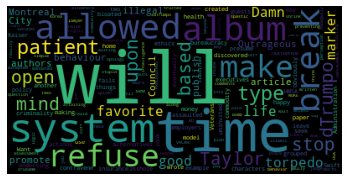

In [71]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Not offensive word cloud
text = df_small_not_offensive['comment_text'].values 
wordcloud = WordCloud().generate(str(text))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

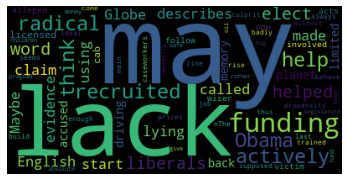

In [72]:
# Offensive word cloud
text = df_small_offensive['comment_text'].values 
wordcloud = WordCloud().generate(str(text))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


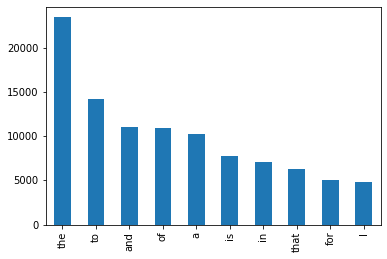

In [73]:
df_small_offensive['comment_text'].str.split(expand=True).stack().value_counts().head(10).plot(kind='bar')

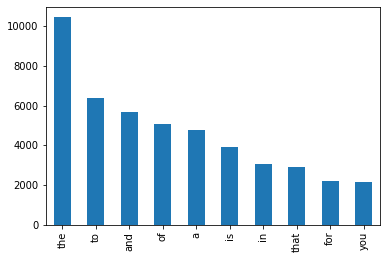

In [74]:
df_small_not_offensive['comment_text'].str.split(expand=True).stack().value_counts().head(10).plot(kind='bar')

We notice that stopwords are increasing prevalant and add a signficant amount of noise. We lowercase all stop words and remove them based on a canonical English stopwords list.

In [75]:
# Remove stop words
from nltk.corpus import stopwords
stop = stopwords.words('english')

# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
df_small_offensive['comment_without_stopwords'] = df_small_offensive['comment_text'].apply(lambda x: ' '.join([word.lower() for word in x.split() if word.lower() not in (stop)]))
df_small_not_offensive['comment_without_stopwords'] = df_small_not_offensive['comment_text'].apply(lambda x: ' '.join([word.lower() for word in x.split() if word.lower() not in (stop)]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


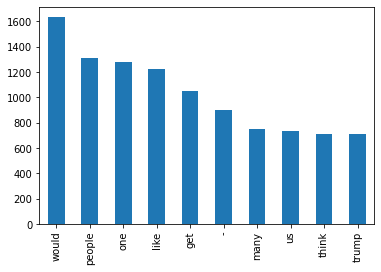

In [76]:
df_small_offensive['comment_without_stopwords'].str.split(expand=True).stack().value_counts().head(10).plot(kind='bar')

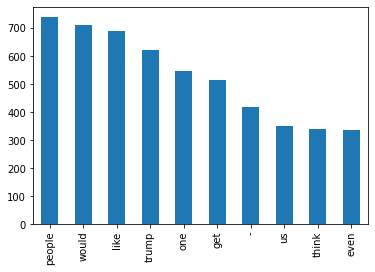

In [77]:
df_small_not_offensive['comment_without_stopwords'].str.split(expand=True).stack().value_counts().head(10).plot(kind='bar')

In [78]:
# Find difference between word frequencies in offensive and not offensive comments 
df_small_offensive['comment_without_stopwords'].str.split(expand=True).stack().value_counts()

would            1634
people           1312
one              1282
like             1228
get              1054
                 ... 
overdoses,          1
ratio,              1
purification?       1
figures)            1
honor"              1
Length: 53017, dtype: int64

In [79]:
offensive_freq = df_small_offensive['comment_without_stopwords'].str.split(expand=True).stack().value_counts()
not_offensive_freq = df_small_not_offensive['comment_without_stopwords'].str.split(expand=True).stack().value_counts()
best_offensive_words = (offensive_freq-not_offensive_freq).fillna(offensive_freq)

In [80]:
# Sort so most offensive words percolate to top
best_offensive_words = best_offensive_words.sort_values()

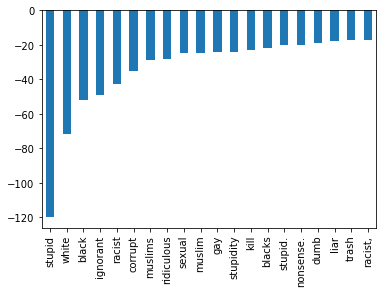

In [81]:
# best_offensive_words
best_offensive_words.head(20).plot(kind='bar')

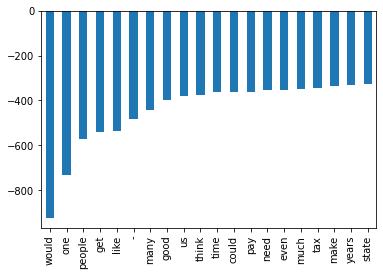

In [82]:
best_not_offensive_words = (not_offensive_freq-offensive_freq).fillna(not_offensive_freq)
best_not_offensive_words = best_not_offensive_words.sort_values()
best_not_offensive_words.head(20).plot(kind='bar')

Can we use a third party sentiment analyzer to see if our inferences/heuristics match the ground truth?

In [83]:
from textblob import TextBlob

In [84]:
df_small_offensive['emotion'] = df_small_offensive['comment_without_stopwords'].apply(lambda x:TextBlob(x).sentiment.polarity)
df_small_not_offensive['emotion'] = df_small_not_offensive['comment_without_stopwords'].apply(lambda x:TextBlob(x).sentiment.polarity)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f287c5ca350>]],
      dtype=object)

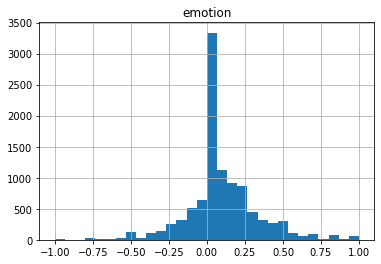

In [85]:
# Plot distribution of emotion scores
# Seems to be somewhat normally distributed with a mode around .5
df_small_offensive.hist(column='emotion', bins=30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f287fa8cf50>]],
      dtype=object)

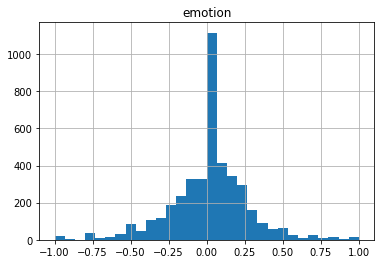

In [86]:
# Plot distribution of emotion scores
# Seems to be right skewed with mode around .5
df_small_not_offensive.hist(column='emotion', bins=30)

In [87]:
# Plot emotion vs length
df_small_not_offensive['length_of_comment'] = df_small_not_offensive['comment_without_stopwords'].apply(lambda x: len(x))
df_small_offensive['length_of_comment'] = df_small_offensive['comment_without_stopwords'].apply(lambda x: len(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Are there other heuristics/features we can pull from the data to increase model accuracy such as comment length?

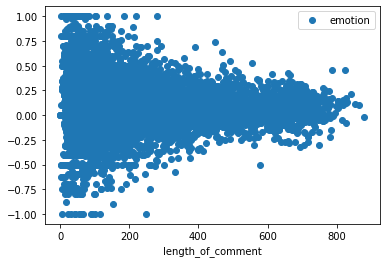

In [88]:
df_small_offensive.plot(x='length_of_comment', y='emotion', style='o')

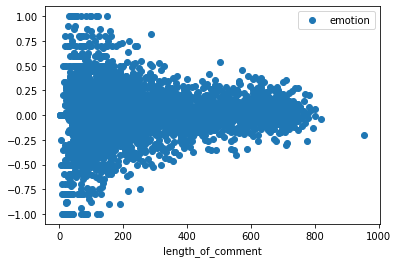

In [89]:
df_small_not_offensive.plot(x='length_of_comment', y='emotion', style='o')

Comment length seem to not be a relevant factor in determined offensive. However, our dataset significantly skews towards shorter (200 characters or less) comments so some signal may be lost in the noise. Using toxic words instead seems to be a more fruitful pursuit. 

In [91]:
# Don't these look offensive??
df_small_not_offensive

,id,target,comment_text,label,comment_without_stopwords,emotion,length_of_comment
1594622,6072922,0.700000,Damn the torpedo's my favorite album. That alb...,1,damn torpedo's favorite album. album marker ti...,0.600000,66
688304,1083436,0.400000,Outrageous that Montreal City Council is allow...,1,outrageous montreal city council allowed promo...,-0.233333,253
1115790,5479703,0.166667,HMSA discovered the way to make more money for...,1,hmsa discovered way make money executives bloa...,-0.500000,270
1415003,5848346,0.200000,Blame others for what you're guilty of is a Sa...,1,blame others guilty saul alinsky tactic that's...,-0.095455,444
722413,5005935,0.300000,z35man Absolutely correct and the chores of is...,1,z35man absolutely correct chores islamophobia ...,0.095238,383
...,...,...,...,...,...,...,...
101993,366807,0.300000,This manager is missing his calling. He should...,1,manager missing calling. working government. k...,-0.200000,80
259059,560583,0.300000,Part of being socialized is accepting that you...,1,part socialized accepting person everything wa...,0.189286,237
1330532,5741326,0.842857,obviously this asshole grouped and assaulted T...,1,obviously asshole grouped assaulted taylor swi...,0.050000,181
628166,1010487,0.200000,you are naive if you think that they will stop...,1,naive think stop mandated islamic crusade. pla...,-0.150000,88


In [92]:
df_small_offensive

,id,target,comment_text,label,comment_without_stopwords,emotion,length_of_comment
1344733,5758986,0.0,Would you think Obama actively recruited the h...,0,would think obama actively recruited help radi...,0.333333,76
319736,634062,0.0,There is a word in English that describes a cl...,0,word english describes claim made evidence: ca...,0.000000,85
678379,1071357,0.0,"The planet where memory is limited, where the ...",0,"planet memory limited, accused could back driv...",-0.189286,144
1391642,5819320,0.0,140 million is only if the city got this one p...,0,140 million city got one projection correct. k...,-0.250000,166
376856,704294,0.0,"tons of holes in Myler's story, glad I'm not t...",0,"tons holes myler's story, glad i'm one noticed...",0.500000,52
...,...,...,...,...,...,...,...
532708,895091,0.0,How is the end of NAFTA a bad thing? You make...,0,end nafta bad thing? make broad claim give det...,-0.172917,162
1517091,5977623,0.0,"Thanks, Nathan.",0,"thanks, nathan.",0.200000,15
1311182,5717540,0.0,Your last line may be the ideal but wasn't alw...,0,last line may ideal always thus.,0.450000,32
538513,902053,0.0,don't build it and prices rise when they come,0,build prices rise come,0.000000,22


# Feature Generation and Modeling

## tf-idf

Term frequency-inverse document frequency can be used to determine how important a word is in the context of a corpus of text. We decided to incorporate this statistic into our model to introduce weighting and distinguish important words (i.e. words that appear repeatedly but only in one document or comment in this case). This helps to decrease weighting of repeated words (e.g. stop words such as "you" or "the") and ideally give more weight to words that appear only in selected cases, such as the ones we saw in our exploration above (e.g. "stupid", "ignorant", etc.)

In [ ]:
# tf-idf word
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_tfidf_train_sm = vectorizer.fit_transform(df_train_sm["comment_text"])
X_tfidf_test_sm = vectorizer.transform(df_test_sm["comment_text"])

X_tfidf_train_md = vectorizer.fit_transform(df_train_md["comment_text"])
X_tfidf_test_md = vectorizer.transform(df_test_md["comment_text"])

X_tfidf_train_lg = vectorizer.fit_transform(df_train_lg["comment_text"])
X_tfidf_test_lg = vectorizer.transform(df_test_lg["comment_text"])

The dataset that we chose to explore contained many more non-toxic comments than toxic comments, which could potentially bias the results of our models (e.g. a model that always predicts non-toxicity would be right the majority of the time). To combat this, we used a lower threshold for our binary label (i.e. 0.1 instead 0.5) and also set the class weight for our model to be balanced. This means that non-toxic samples will receive lower weighting than toxic samples to account for the fact that there are fewer toxic comments.  

In [ ]:
# Logistic regression w/ tf-idf 
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight = 'balanced', max_iter = 400)
model.fit(X_tfidf_train_lg, df_train_lg["label"])
p = model.predict_proba(X_tfidf_test_lg)[:,1]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# AUC for logistic regression w/ tf-idf 
from sklearn.metrics import roc_auc_score
roc_auc_score(df_test_lg['label'], p)

0.847214386183274

We can take a look at the results of our model to get a better understanding of which words were determined to be more important. As you can see in the output below, the top 20 words include “idiot”, “fool”, “stupid”, “moron”, as well as different variations on those base words. All of these words do have negative or hurtful connotations, which supports the success of the model.

In [ ]:
# Reverse tf-idf vocabulary mappings
indexToWords = {value : key for key, value in vectorizer.vocabulary_.items()}
v = list(model.coef_[0])
coef = [coef for coef, id in list(zip(v, range(len(v))))]
words = [indexToWords[id] for coef, id in list(zip(v, range(len(v))))]
wordsWithCoeff = pd.DataFrame({"Coefficient" : coef, "Word" : words})
wordsWithCoeff.sort_values(by='Coefficient', ascending=False).head(20)

,Coefficient,Word
241009,29.966291,stupid
128529,21.425366,idiot
128549,19.985112,idiots
241032,18.860897,stupidity
86587,18.446364,dumb
215932,18.328833,ridiculous
70028,17.367876,crap
190494,17.234148,pathetic
129059,16.724002,ignorant
128538,15.598499,idiotic


Additionally, we tried a model using xgboost on the same feature matrix in order to explore non-linear decision boundaries (seen below). However, because our dataset is so large, we could only successfully run this on our medium dataset (1/10th of the full 1.8 million comments). Based on AUC scores run on the same dataset, we determined the logistic regression appeared more successful (~0.85 as compared to ~0.74) and so we chose to continue with that model instead. 

In [ ]:
# xgboost w/ tf-idf 
import xgboost as xgb
from xgboost import XGBClassifier

model_tfidf_xgb = XGBClassifier(objective = "binary:logistic", max_depth=5, n_estimators=100)
model_tfidf_xgb.fit(X_tfidf_train_md, df_train_md["label"])
p_tfidf_xgb = model_tfidf_xgb.predict_proba(X_tfidf_test_md)

In [ ]:
# AUC for xgboost w/ tf-idf 
roc_auc_score(df_test_md['label'], p_tfidf_xgb[:,1])

0.7433791818763303

Expanding beyond just a simple word tf-idf statistic, we explored including character n-grams (where n = 1, 2, and 3) in order to address cases where users misspell or attempt to modify their words by using other characters or spellings (e.g. "2night" instead of "tonight"). To do this, we create another vectorizer which analyzes based on characters with a set ngram range and concatenate the results with the word-only matrix. 

In [ ]:
# tf-idf char
vectorizer2 = TfidfVectorizer(analyzer='char', ngram_range = (1,3))
X_tfidf_train2 = vectorizer.fit_transform(df_train_lg["comment_text"])
X_tfidf_test2 = vectorizer.transform(df_test_lg["comment_text"])

In [ ]:
# Concatenate char w/ word 
from scipy.sparse import hstack

X_tfidf_train3 = hstack([X_tfidf_train_lg, X_tfidf_train2])
X_tfidf_test3 = hstack([X_tfidf_test_lg, X_tfidf_test2])

In [ ]:
# Logistic regression w/ tf-idf (char and word)
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight = 'balanced', max_iter = 1000)
model.fit(X_tfidf_train3, df_train_lg["label"])
p = model.predict_proba(X_tfidf_test3)[:,1]

In [ ]:
# AUC for logistic regression w/ TFIDF (char and word)
roc_auc_score(df_test_lg['label'], p)

0.8472851656157255

Ultimately, for this dataset, including the character n-grams did not make a significant difference as compared to the model based on words alone. However, we believe this remains a potentially important technique if there are many instances of word manipulation to avoid detection. 

## Word2vec

Early on in the project, we explored using a Word2vec feature in a model with xgboost. Instead of representing a comment with one hot encoding, Word2vec represents each sentence as a high dimensional real vector. We successfully ran the model on a smaller sample of our dataset (1/100
 of the total), but due to time complexity of spacy Word2vec and average AUC scores (~0.78) as compared to other models we ran on the same sampled dataset, we decided to focus on pursuing other models. 


In [ ]:
# Import libraries and load data
import spacy
import numpy as np
nlp = spacy.load("en_core_web_lg")

# Generate vectors for training and testing
X_w2v_train = np.array([nlp(text).vector for text in df_train_sm["comment_text"]])
X_w2v_test = np.array([nlp(text).vector for text in df_test_sm["comment_text"]])

In [ ]:
# Create binary logistic xgboost model and fit
model_w2v = XGBClassifier(objective = "binary:logistic", max_depth=10, n_estimators=100)
model_w2v.fit(X_w2v_train, df_train_sm["label"])
p_w2v = model_w2v.predict_proba(X_w2v_test)

In [ ]:
# AUC score for Word2vec
from sklearn.metrics import roc_auc_score

roc_auc_score(df_test_sm['label'], p_w2v[:,1])

0.7789834444841477

## Logistic Regression on Features

### Feature generation 
(Carlin words, Trump, stop words, sentence length/count, comma count, reading level, swear words)

Next we tried to generate our own features by manipulating the text to find unique properties. Our first feature we pulled was a count of the famous 7 dirty words that George Carlin claimed could not be used on television. The routine was aired on radio station WBAI and the broadcast was promptley found "indecent but not obscene" by the Supreme Court in FCC v. Pacifica Foundation




https://www.youtube.com/watch?v=kyBH5oNQOS0

In [29]:
# Determine count of Carlin words
carlin_words = set(["shit", "piss", "fuck", "cunt", "cocksucker", "motherfucker", "tits"])

def carlin(text):
  if isinstance(text, float):
    print(text)
  
  splitty = text.split()
  ret = 0
  for x in splitty:
    if x in carlin_words:
      ret+= 1
  return ret

df['carlincount'] = df['comment_text'].apply(lambda x: carlin(x))
df['carlin'] = df['carlincount'].apply(lambda x: x > 0)

In [30]:
# See Carlin count
df.sort_values(by=['carlincount'], ascending=False)

,id,target,comment_text,label,length,carlincount,carlin
1330428,5741205,0.969697,You're a fucking piece of shit idiot HRC suppo...,1,372,4,True
190911,474655,0.787500,I served honorably with Edgar Rodriguez in Ira...,1,989,3,True
1354075,5770376,0.700000,We need to stay out of politics we all fuckin ...,1,448,3,True
509052,867020,0.787879,I really want to know why the shit are you guy...,1,203,3,True
590315,965056,0.883333,Based on these comments were all fucked. Fuck ...,1,177,3,True
...,...,...,...,...,...,...,...
601930,978777,0.000000,"Yup, Charles, and the con artist barkers are...",0,147,0,False
601929,978776,0.000000,slander is your middle name. it would be nice...,0,63,0,False
601928,978774,0.200000,'\nYears of historical records document and pr...,1,353,0,False
601927,978773,0.500000,Pride has just become a big sex fest and every...,1,131,0,False


We also predicted that reference to politics might be corelated to toxicity. Because the election, and in particular, Donald Trump, was such a prevalent topic during the time period that data was collected, Trump is mentioned in more then 100,000 comments.

In [31]:
# Trump 
def containsTrump(text):
  if isinstance(text, float):
    print(text)
  
  splitty = text.split()
  for x in splitty:
    if x.lower() == "trump":
      return 1
  return 0

df['containsTrump'] = df['comment_text'].apply(lambda x: containsTrump(x))
print(len(df[df['containsTrump']==1]))


125604


In [32]:
df.sort_values(by=['containsTrump','target'], ascending=False)

,id,target,comment_text,label,length,carlincount,carlin,containsTrump
3406,245354,1.0,"Marlene Pearson, do you really think Trump or ...",1,285,0,False,1
14616,260143,1.0,Because donald trump is a hateful windbag with...,1,121,0,False,1
29155,277505,1.0,"No, she was the one who said this, ""Looking at...",1,980,0,False,1
31139,279906,1.0,And here I thought Trump was this great leader...,1,146,0,False,1
45352,297332,1.0,"Uh, Trump is an idiot and a loud-mouth, but if...",1,980,0,False,1
...,...,...,...,...,...,...,...,...
1804868,6333965,0.0,"cont....GBA: ""here's the summation of that ""l...",0,615,0,False,0
1804869,6333967,0.0,"Maybe the tax on ""things"" would be collected w...",0,197,0,False,0
1804870,6333969,0.0,What do you call people who STILL think the di...,0,74,0,False,0
1804871,6333982,0.0,"thank you ,,,right or wrong,,, i am following ...",0,57,0,False,0


We also thought that the structure of sentences might be different between toxic and non-toxic comments. One way we decided to define that difference was to count the number of stop words in each comment to determine if this metric  correlates with either toxic or non-toxic comments.


In [33]:
### Count stop words
from nltk.corpus import stopwords

stopdict = {}
isLoveReal = True
for x in stopwords.words('english'):
  stopdict[x] = isLoveReal

def stopCount(text):
  if isinstance(text, float):
    print(text)
  
  splitty = text.split()
  ret = 0
  for x in splitty:
    if x.lower() in stopdict:
      ret += 1
  return ret

df['stopCount'] = df['comment_text'].apply(lambda x: stopCount(x))


In [34]:
df.sort_values(by=['target'], ascending=True)

,id,target,comment_text,label,length,carlincount,carlin,containsTrump,stopCount
0,59848,0.0,"This is so cool. It's like, 'would you want yo...",0,101,0,False,0,7
1090318,5449128,0.0,Nothing much going on so I poked around yer st...,0,212,0,False,0,18
1090316,5449126,0.0,Original party affiliation Republican - got fi...,0,444,0,False,1,24
1090315,5449125,0.0,Where i live there are freeway accidents every...,0,309,0,False,0,28
1090312,5449122,0.0,Are you talking about the donald?,0,33,0,False,0,4
...,...,...,...,...,...,...,...,...,...
1475364,5925325,1.0,The best qualified candidate is not always the...,1,121,0,False,0,9
1709840,6218461,1.0,"Before these jerks had power, they wouldn't ge...",1,121,0,False,0,12
579853,951750,1.0,"In other lists, Rex seems to indicate that he ...",1,154,0,False,0,15
1566519,6038520,1.0,you're getting goofy,1,20,0,False,0,1


In addition to looking at stopwords, we looked at the number of sentences, average length of sentence, and certain punctuation usage to try to find potential overlaps. 

In [35]:
### SENTENCE LENGTH/COUNT
from nltk.tokenize import sent_tokenize
import numpy as np

def sentenceLength(text):
    replacey = text.replace('!','.')
    replacey = text.replace('?','.')
    splitty = replacey.split('.') # split on sentences
    length = len(splitty)
    cumsum = 0
    for x in splitty:
      cumsum += len(x.split()) # split on space
    if replacey[-1] == '.':
      length -=1
    return cumsum / length 

def sentenceCount(text):
    replacey = text.replace('!','.')
    replacey = text.replace('?','.')
    splitty = text.split('.')
    length = len(splitty)
    return length
    
df['sentenceLength'] = df["comment_text"].apply(lambda x : sentenceLength(x))

df['sentenceCount'] = df["comment_text"].apply(lambda x : sentenceCount(x))

In [36]:
## commma count

def commaCount(text):
  if isinstance(text, float):
    print(text)
  ret = 0
  for x in text:
    if x.lower() == ',':
      ret += 1
  return ret

df['commaCount'] = df["comment_text"].apply(lambda x : commaCount(x))


Here, we plotted sentence length and sentence count against the target value to get a better understanding of how these features are distributed across the dataset.

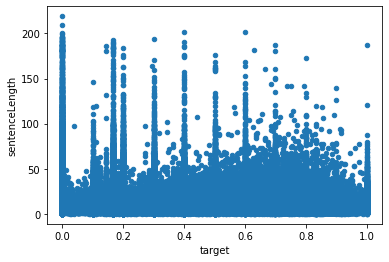

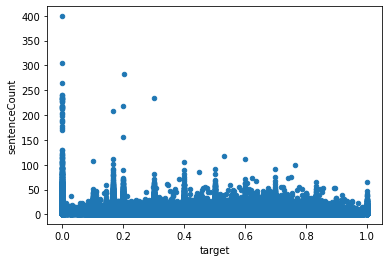

In [37]:
df.plot.scatter('target', 'sentenceLength')

df.plot.scatter('target', 'sentenceCount')

Here we counted the number of times the 50 most common words in Toxic comments and 50 most common words in non toxic comments that we found in our Data exploration segment. for both lists we removed stopwords so that we would have less noise in the function

In [109]:
best_offensive_words_set = set(best_offensive_words.head(50).keys())
best_not_offensive_words_set = set(best_not_offensive_words.head(50).keys())

def calcbadWords(text):
  if isinstance(text, float):
    print(text)
  
  splitty = text.split()
  ret = 0
  for x in splitty:
    if x in best_offensive_words_set:
      ret+= 1
  return ret


def calcgoodWords(text):
  if isinstance(text, float):
    print(text)
  
  splitty = text.split()
  ret = 0
  for x in splitty:
    if x in best_not_offensive_words_set:
      ret+= 1
  return ret


df['calculatedBadcount'] = df['comment_text'].apply(lambda x: calcbadWords(x))

df['calculatedgoodcount'] = df['comment_text'].apply(lambda x: calcgoodWords(x))


Another feature we decided to explore was social justice buzzwords, which we obtained from Dalhousie University. We thought these words might be interesting to explore as they contain mentions of some identities may frequently be attacked in hate speech and other forms of offensive comments. Additionally, we thought that there was potential for these words to be used in a flame war scenerio in which two or more participants attack eachother.

https://en.wikipedia.org/wiki/Flaming_(Internet)#Flame_war

In [38]:
#SOCIAL JUSTICE TERMS
buzzwords = {'Ableism','Accomplice','Ageism','Ally','Anti','Appropriation','Asexual','Assigned','Binary','Biphobia','Birth', 'Bisexual','Cisgender','Cissexism','Classism','Collusion','Coming','Competence','Conforming','Cultural','Discrimination', 'Empathy','Equality','Equity','Ethnocentrism','Expression','Gay','Gender','Genderqueer','Group','Hate','Heterosexism', 'Heterosexual','Homophobia','Identity','Inclusive','Internalized','Intersectionality','Intersex','Islamophobia','Jewish', 'Justice','Lesbian','Neutral','Non','Oppression','Orientation','Out','Pansexual','Power','Prejudice','Privilege','Profiling', 'Pronoun','Queer','Racial','Racism','Religious','Semitism','Sex','Sexism','Sexual','Social','Stereotype','Transgender', 'Transphobia','Xenophobia', 'Trump'}

def buzzWords(text):
  if isinstance(text, float):
    print(text)
  
  splitty = text.split()
  ret = 0
  for x in splitty:
    if x in buzzwords:
      ret+= 1
  return ret

df['buzzcount'] = df['comment_text'].apply(lambda x: buzzWords(x))

#taken/modified from https://www.dal.ca/dept/hres/education-campaigns/educational-resources/definitions.html


At the suggestion of Dr. Ives, we opted to calculate the supposed reading level of comments and add them as a feature. We opted for the Automated readability index since it relies on statistics that are easily calcuated by parsing the text automatically. The index attempts to approximate the US grade level of given text.


https://en.wikipedia.org/wiki/Automated_readability_index

https://www.tutorialspoint.com/readability-index-in-python-nlp


In [39]:
##NLP reading level

def wordCount(text):
    replacey = text.replace('!',' ')
    replacey = text.replace('?',' ')
    replacey = text.replace('-',' ')
    replacey = text.replace('.',' ')
    splitty = replacey.split(' ') 
    
    setty = set()
    for x in splitty:
      setty.add(x) 
    
    return len(setty)

def charPerWord(text):
    replacey = text.replace('!',' ')
    replacey = text.replace('?',' ')
    replacey = text.replace('-',' ')
    replacey = text.replace('.',' ')
    splitty = replacey.split(' ') 
    
    listy = []
    cumsum = 0
    for x in splitty:
      listy.append(x) 
      cumsum+= len(x)
    return cumsum / len(listy)

df['wordCount'] = df["comment_text"].apply(lambda x : wordCount(x))

df['charPerWord'] = df["comment_text"].apply(lambda x : charPerWord(x))

df['AutomatedReadabilityIndex'] = 4.71 * df['charPerWord'] + 0.5 * df['sentenceLength'] -21.43


In [40]:
df.sort_values(by=['target'], ascending=True)

,id,target,comment_text,label,length,carlincount,carlin,containsTrump,stopCount,sentenceLength,sentenceCount,commaCount,buzzcount,wordCount,charPerWord,AutomatedReadabilityIndex
0,59848,0.0,"This is so cool. It's like, 'would you want yo...",0,101,0,False,0,7,5.000000,2,2,0,20,4.100000,0.381000
1090318,5449128,0.0,Nothing much going on so I poked around yer st...,0,212,0,False,0,18,10.250000,5,0,0,39,3.630435,0.794348
1090316,5449126,0.0,Original party affiliation Republican - got fi...,0,444,0,False,1,24,9.000000,6,1,2,65,4.855263,5.938289
1090315,5449125,0.0,Where i live there are freeway accidents every...,0,309,0,False,0,28,28.000000,3,2,0,46,4.438596,13.475789
1090312,5449122,0.0,Are you talking about the donald?,0,33,0,False,0,4,6.000000,1,0,0,6,4.666667,3.550000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475364,5925325,1.0,The best qualified candidate is not always the...,1,121,0,False,0,9,10.000000,3,0,0,21,4.809524,6.222857
1709840,6218461,1.0,"Before these jerks had power, they wouldn't ge...",1,121,0,False,0,12,11.000000,3,2,0,22,4.083333,3.302500
579853,951750,1.0,"In other lists, Rex seems to indicate that he ...",1,154,0,False,0,15,9.666667,4,2,0,24,3.843750,1.507396
1566519,6038520,1.0,you're getting goofy,1,20,0,False,0,1,3.000000,1,0,0,3,6.000000,8.330000


ARI is supposed to gadge the grade level of text but because of the weight placed on longer length words, this can give spam a abnormally high value. Fortunately this adds value to the model in the form of predictive power. Comments with abnormally high ARI will skew more toxic.

In [41]:

df.sort_values(by=['AutomatedReadabilityIndex'], ascending=True)

,id,target,comment_text,label,length,carlincount,carlin,containsTrump,stopCount,sentenceLength,sentenceCount,commaCount,buzzcount,wordCount,charPerWord,AutomatedReadabilityIndex
780377,5075639,0.0,.,0,1,0,False,0,0,0.0,2,0,0,1,0.000000,-21.43
1398545,5827753,0.1,.,0,1,0,False,0,0,0.0,2,0,0,1,0.000000,-21.43
449292,794168,0.0,.,0,1,0,False,0,0,0.0,2,0,0,1,0.000000,-21.43
936434,5264722,0.0,.,0,1,0,False,0,0,0.0,2,0,0,1,0.000000,-21.43
841025,5149813,0.0,...,0,3,0,False,0,0,0.0,4,0,0,1,0.000000,-21.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205127,492789,0.0,Clifford Farmer: Hahahahahahahahahhahahahahahh...,0,499,0,False,0,0,3.0,1,0,0,3,165.666667,760.36
751652,5040908,0.0,Exactly_what_black_list_has_kept_conservatives...,0,198,0,False,0,0,1.0,1,0,0,1,198.000000,911.65
918432,5243416,0.2,WHITEWASHINGWHITEWASHINGWHITEWASHINGWHITEWASHI...,1,432,0,False,0,0,1.0,1,0,0,1,432.000000,2013.79
534964,897680,0.0,✰ ✰ ✰ ✰ ✰ ✰ ▀▀▀▀▀▀▀...,0,576,0,False,0,0,66.0,1,0,0,1,576.000000,2724.53


Here we plot the ARI vs the target 

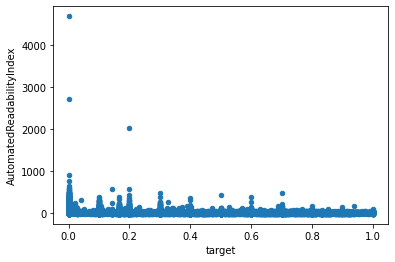

In [42]:
import matplotlib as plt
df.plot.scatter('target', 'AutomatedReadabilityIndex')

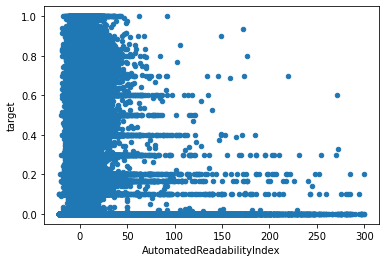

In [118]:
valid_dfdf_filtered = df[df['AutomatedReadabilityIndex'] <= 300]

valid_dfdf_filtered.plot.scatter('AutomatedReadabilityIndex','target')

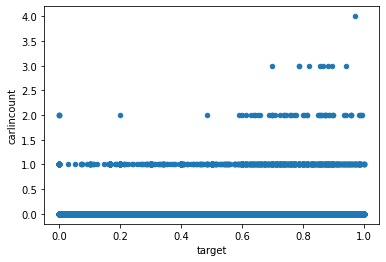

In [44]:
df.plot.scatter('target', 'carlincount')


In addition to the words that we calculated from data exploration, we also counted the occurrences of common english swear words in the comment text

In [45]:
# Taken/modified from wikitionary: https://en.wiktionary.org/wiki/Category:English_swear_words
badWordsSet = set(['arse', 'ass', 'asshole', 'bastard', 'bitch', 'bollocks', 'brotherfucker', 'bugger', 'bullshit', 'childfucker', 'cocksucker', 'crap', 'cunt', 'damn', 'effing', 'fatherfucker', 'frigger', 'fuck', 'goddamn', 'godsdamn', 'hell', 'holy', 'shit', 'horseshit', 'Jesus', 'Christ', 'motherfucker', 'nigga', 'piss', 'prick', 'shit', 'shitass', 'sisterfucker', 'slut', 'bitch', 'whore', 'Jesus', 'twat'])

def badWords(text):
  if isinstance(text, float):
    print(text)
  
  splitty = text.split()
  ret = 0
  for x in splitty:
    if x in badWordsSet:
      ret+= 1
  return ret

df['badcount'] = df['comment_text'].apply(lambda x: badWords(x))


In [67]:
df_small_not_offensive_bad_count = df.loc[df['label'] == 1]
df_small_offensive_bad_count = df.loc[df['label'] == 0]

Below is the distribution of bad word counts between offensive comment and non offensive comments. The distribution is heavily right skewed mainly due to the underlying data. Many comments are short to begin with therefore they will have few bad words regardless of their offensiveness. While small, there is a slightly longer tail of bad word counts for offensive comments versus not offensive. 

(array([1.278504e+06, 1.575000e+03, 6.250000e+02, 7.000000e+01,
        2.800000e+01, 1.500000e+01, 2.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([ 0. ,  1.4,  2.8,  4.2,  5.6,  7. ,  8.4,  9.8, 11.2, 12.6, 14. ]),
 <a list of 10 Patch objects>)

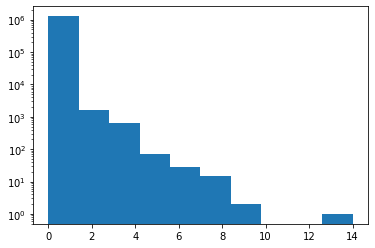

In [68]:
# Histogram frequency of bad word count
plt.hist(df_small_offensive_bad_count['badcount'], log=True)

(array([5.22367e+05, 1.26700e+03, 2.95000e+02, 7.10000e+01, 3.30000e+01,
        1.90000e+01, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <a list of 10 Patch objects>)

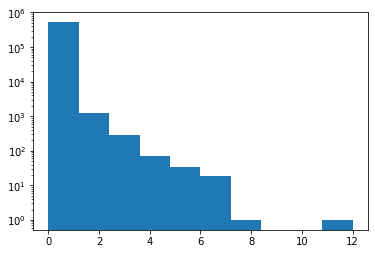

In [69]:
# Histogram frequency of bad word count
plt.hist(df_small_not_offensive_bad_count['badcount'], log=True)

Here we have a correlation matrix between all of our features and the labels. As you can see our calculated good, Calculated bad, Buzzwords and the Trump features were most correlated with our labels.

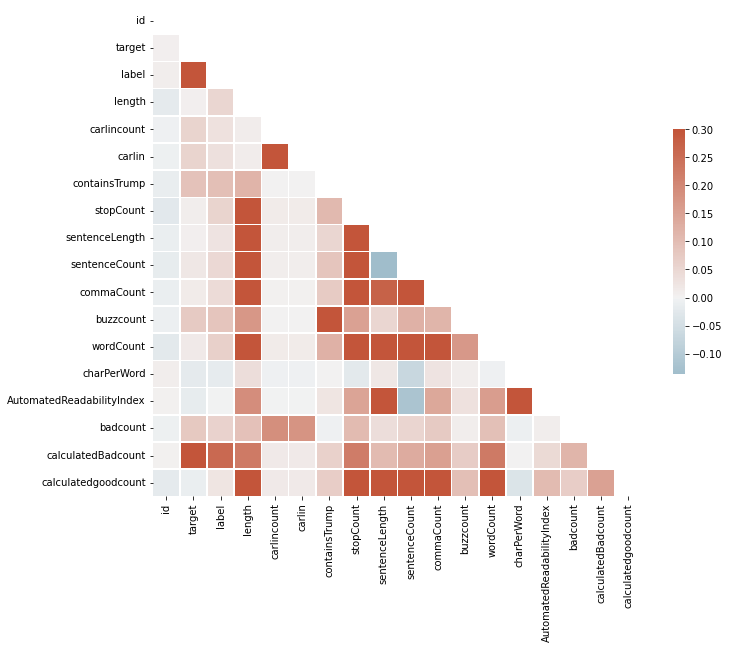

In [110]:
# TODO correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr()

#### THIS IS TAKEN FROM SEABORN DOCS https://seaborn.pydata.org/examples/many_pairwise_correlations.html
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

##### TAKEN VERBITAM ^^^^^^^^

### Logistic Regression

The first model we used to train on these features was this logistic model. It was initially very 'accurate' but had a low AUC. We realized that it was only achieving high accuracy because it was guessing that the vast majority of comments were non toxic. To deal with this issue we changed the class weight to balanced and acheived a higher AUC at the cost of accuracy. Ultimately the model was not very good but did better then the pre trained roBERTa model that we use later in the notebook

In [111]:
####### Logistic Modeling

'''looked at some sample code from https://towardsdatascience.com/linear-regression-in-python-sklearn-vs-excel-6790187dc9ca'''

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

#evenDF = df.sort_values(by=['label'], ascending=False).head(288668) # this was an dataframe with  even split between classes. We thought it would help the model but it did not

y = df['label']

x = df.drop(columns=['target','label','comment_text','id'])


sc_X = StandardScaler() # SCALING GOES HERE
x = sc_X.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

reg = LogisticRegression(class_weight='balanced',max_iter = 400).fit(X_train, y_train)
print("The Logistic regression score on training data is ", round(reg.score(X_train, y_train),2))

predict=reg.predict(X_test)

labels =  list(y_test)
eval = [x for i, x in enumerate(predict) if predict[i]== labels[i]]

The Logistic regression score on training data is  0.72


In [112]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(list(y_test), predict))

0.6132499112376538


In [113]:
print(len(eval)/len(predict))### confusion matrix
print(len([x for x in predict if x == 0]))
print(len([x for x in predict if x == 1]))
print(len([x for x in labels if x ==0 ]))
print(len([x for x in labels if x ==1 ]))

0.7223048687582243
290975
70000
256702
104273


We also tried putting the features we generated into a random forest. This had the same problems as the logistic model although it generally did a bit better. 

In [116]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf = RandomForestClassifier(class_weight='balanced',max_depth=2, random_state=0)
clf.fit(X_train, y_train)

print(clf.score(X_train, y_train))

predict = clf.predict(X_test)

labels =  list(y_test)
eval = [x for i, x in enumerate(predict) if predict[i]== labels[i]]


print(roc_auc_score(y_test, predict))
print(clf.score(X_test, y_test))

0.7284671573288714
0.6139871888137949
0.7300921116420804


In [115]:

print(clf.score(X_test, y_test))
print(len([x for x in predict if x == 0]))
print(len([x for x in predict if x == 1]))
print(len([x for x in labels if x ==0 ]))
print(len([x for x in labels if x ==1 ]))



0.7300921116420804
297114
63861
256702
104273


## Pretrained RoBERTa

We utilize an advanced Bidirectional Encoder Representations from Transformers (BERT) model pretrained on offensive twitter comments to predict the offensiveness of hitherto unseen comments. Instead of a traditional BERT model, we leverage RoBERTa, which in contrast to BERT, dynamically masks outputs. As defined by the model’s creators: “BERT relies on randomly masking and predicting tokens. The original BERT implementation performed masking once during data preprocessing, resulting in a single static mask. To avoid using the same mask for each training instance in every epoch, training data was duplicated 10 times so that each sequence is masked in 10 different ways over the 40 epochs of training. Thus, each training sequence was seen with the same mask four times during training.
We compare this strategy with dynamic masking where we generate the masking pattern every time we feed a sequence to the model. This becomes crucial when pretraining for more steps or with larger datasets.” As such, RoBERTa performs significantly better than its contemporary models due to its innovative masking paradigm.

In [50]:
pip install transformers numpy scipy 

In [51]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy as np
from scipy.special import softmax
import csv
import urllib.request

In [52]:
MODEL = f"cardiffnlp/twitter-roberta-base-offensive"

tokenizer = AutoTokenizer.from_pretrained(MODEL)

model = AutoModelForSequenceClassification.from_pretrained(MODEL)
model.save_pretrained(MODEL)

Downloading:   0%|          | 0.00/593 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/499M [00:00<?, ?B/s]

Test the model with known offensive and non-offensive comments

In [53]:
text = "this is a very cute test of my stuff"
encoded_input = tokenizer(text, return_tensors='pt')
output = model(**encoded_input)
scores = output[0][0].detach().numpy()
scores = softmax(scores)

In [54]:
scores

array([0.9089895 , 0.09101055], dtype=float32)

In [55]:
text = "i hate you bitch"
encoded_input = tokenizer(text, return_tensors='pt')
output = model(**encoded_input)
scores = output[0][0].detach().numpy()
scores = softmax(scores)

In [56]:
scores

array([0.06873519, 0.9312649 ], dtype=float32)

In [57]:
text = "I love you sooo much"
encoded_input = tokenizer(text, return_tensors='pt')
output = model(**encoded_input)
scores = output[0][0].detach().numpy()
scores = softmax(scores)

In [58]:
scores

array([0.94691163, 0.0530883 ], dtype=float32)

In [59]:
new_X_test = list(df["comment_text"])
new_y_test = list(df["label"])

Downsample then test and evaluate

In [60]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(new_X_test, new_y_test, test_size=0.00005, random_state=1)
print(len(X_test_1))

91


In [61]:
pred_y = []
for example in X_test_1:
  encoded_input = tokenizer(example, return_tensors='pt')
  output = model(**encoded_input)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  pred_y.append(False if scores[0] >= .5 else True)


In [62]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test_1, pred_y)

0.7362637362637363

In [64]:
roc_auc_score(y_test_1, pred_y)

0.6607521186440678

## RoBERTa: fine tuning pretrained model with toxicity data

In addition to using the pretrained RoBERTa model above, we decided to try tuning a base RoBERTa model using our own toxicity data. Due to processor and time constraints, we were only able to run the models on our smallest sampled dataset (1/100th of the full dataset). Even with the smallest dataset, we received an AUC of ~0.86. From conversations with Dr. Ives and our own research, we have reason to believe that our RoBERTa model would perform even better if we were able to run our full dataset, which we are unable to do at the moment due to Colab's GPU limits. 


In [ ]:
# Roberta and Bert models based on examples found at: https://huggingface.co/docs/transformers/model_doc/roberta
# Building tensorflow datasets modeled after: https://www.tensorflow.org/guide/data

In [9]:
!pip install -q transformers==4.6.1 tensorflow==2.4.1

     |████████████████████████████████| 2.2 MB 5.3 MB/s 
     |████████████████████████████████| 394.3 MB 16 kB/s 
     |████████████████████████████████| 895 kB 42.3 MB/s 
     |████████████████████████████████| 3.3 MB 46.7 MB/s 
     |████████████████████████████████| 3.8 MB 48.1 MB/s 
     |████████████████████████████████| 2.9 MB 22.8 MB/s 
     |████████████████████████████████| 462 kB 38.1 MB/s 


In [10]:
from transformers import RobertaTokenizer, TFRobertaModel
import tensorflow as tf
import pandas as pd
import numpy as np

tf.random.set_seed(1)

In [11]:
# Loading tokenizer/model
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
roberta = TFRobertaModel.from_pretrained('roberta-base')

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/657M [00:00<?, ?B/s]

Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


To help adjust for the fact that our dataset contains an unbalanced ratio of non-toxic to toxic comments, we calculated this ratio to be used as a class weight in the BERT and RoBERTa models. 

In [12]:
# Determine average sentence length to get an estimate for MAX_LEN
df["length"] = df["comment_text"].apply(lambda x : len(x))
print(df.length.describe())

# Determine toxicity ratio of data for class weights
counts = dict(df['label'].value_counts())
print(counts)
class_weight = {0:1, 1:(counts[0] / counts[1])}

count    1.804874e+06
mean     2.972343e+02
std      2.691966e+02
min      1.000000e+00
25%      9.400000e+01
50%      2.020000e+02
75%      4.140000e+02
max      1.906000e+03
Name: length, dtype: float64
{0: 1280820, 1: 524054}


In [13]:
# Parameters
epoch = 1
ngpus = 1
batch_size = 16*ngpus
MAX_LEN = 256 # max token length

In [14]:
# Tokenize sentences into fixed size token ID vectors and corresponding labels
def encode_text(txt, labels, tokenizer):
    for tt, ll in zip(txt, labels):
        encoded = tokenizer.__call__(tt, max_length = MAX_LEN, add_special_tokens = True, truncation = True,
                                     padding = 'max_length', return_attention_mask = True, return_tensors='tf')

        yield (encoded.input_ids[0], encoded.attention_mask[0], ll)

In [15]:
# Convert training data into Tensorflow dataset
df_train_used = df_train_sm
ds = tf.data.Dataset.from_generator(lambda: encode_text(df_train_used['comment_text'], df_train_used['label'], tokenizer), 
                                    output_types = (tf.int32, tf.int32, tf.float64),
                                    output_shapes = ((MAX_LEN,),(MAX_LEN,),()))
ds = ds.map(lambda a,b,c: ({"input_ids":a, "attention_mask":b}, c)).batch(batch_size).repeat(epoch)

# Convert test data
df_test_used = df_test_sm
ds_test = tf.data.Dataset.from_generator(lambda: encode_text(df_test_used['comment_text'], df_test_used['label'], tokenizer), 
                                    output_types = (tf.int32, tf.int32, tf.float64),
                                    output_shapes = ((MAX_LEN,),(MAX_LEN,),()))
ds_test = ds_test.map(lambda a,b,c: ({"input_ids":a, "attention_mask":b}, c)).batch(batch_size)

In [16]:
# Set up model
class text_model(tf.keras.Model):
    def __init__(self, base):
        super(text_model,self).__init__(name="text_model")
        self.bert = base
        self.dense3 = tf.keras.layers.Dense(1, activation = 'sigmoid', name = "dense3") 

    def call(self, x):
        yb = self.bert(x).pooler_output
        yb = self.dense3(yb)
        return yb

# Use GPU if available
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  # Run without GPU if device not found
  n = df_train_used.shape[0]
  optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-5)
  loss_fn = 'binary_crossentropy'  
  model = text_model(roberta)
  model.compile(loss=loss_fn, optimizer=optimizer, metrics=[tf.keras.metrics.AUC()])
  model.fit(ds, batch_size = batch_size, steps_per_epoch = n/batch_size/ngpus,
            epochs = epoch, validation_data = ds_test, class_weight = class_weight)
  model.save_weights("/content/model.weights")
else:
  with tf.device('/device:GPU:0'):
    n = df_train_sm.shape[0]
    optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-5)
    loss_fn = 'binary_crossentropy' 
    model = text_model(roberta)
    model.compile(loss=loss_fn, optimizer=optimizer, metrics=[tf.keras.metrics.AUC()])
    model.fit(ds, batch_size = batch_size, steps_per_epoch = n/batch_size/ngpus,
              epochs = epoch, validation_data = ds_test, class_weight = class_weight)
    model.save_weights("/content/model.weights")

    import time
    t1 = time.time()
    p_roberta = model.predict(ds_test)[:,0]
    t2 = time.time()
    print("total prediction time = ", t2-t1)


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experi

In [18]:
from sklearn.metrics import roc_auc_score
roc_auc_score(df_test_sm['label'], p_roberta)

0.8564240441527977

## BERT
After running RoBERTa, we decided to try BERT to see if it would be better suited for our data. Instead of using BERT to vectorize our data as we did with Word2vec,  we connected the BERT output to a sigmoid unit and tried to minimize the loss (binary cross entropy). In this process, known as fine-tuning, we adjust the weights of the BERT model to better fit our labels. 

Due to GPU constraints, we ran this on our smallest sampled dataset (1/100th of the original) and were able to achieve an AUC of ~0.86. On different runs, we were able to achieve AUC up to 0.92. We predict that we would achieve an even higher AUC if we were able to train with our full dataset. 

In [19]:
# Roberta and Bert models based on examples found at: https://huggingface.co/docs/transformers/model_doc/roberta
# Building tensorflow datasets modeled after: https://www.tensorflow.org/guide/data

In [20]:
# Import BERT and set seed
from transformers import BertTokenizer, TFBertModel
tf.random.set_seed(1)

In [21]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert = TFBertModel.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/536M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [22]:
# Parameters
epoch=1
ngpus = 1
batch_size = 16*ngpus
MAX_LEN = 256 # max token length 

In [23]:
# Tokenize sentences into fixed size token ID vectors and corresponding labels
def encode_text(txt, labels, tokenizer):
    for tt, ll in zip(txt, labels):
        encoded = tokenizer.__call__(tt.lower(), max_length = MAX_LEN, add_special_tokens = True, truncation = True,
                                     padding = 'max_length', return_attention_mask = True, return_tensors='tf')
        yield (encoded.input_ids[0], encoded.attention_mask[0], ll)

In [24]:
# Convert training data into Tensorflow dataset
df_train_used = df_train_sm
ds = tf.data.Dataset.from_generator(lambda: encode_text(df_train_used['comment_text'], df_train_used['label'], tokenizer), 
                                    output_types = (tf.int32, tf.int32, tf.float64),
                                    output_shapes = ((MAX_LEN,),(MAX_LEN,),()))
ds = ds.map(lambda a,b,c: ({"input_ids":a, "attention_mask":b}, c)).batch(batch_size).repeat(epoch)

# Convert test data
df_test_used = df_test_sm
ds_test = tf.data.Dataset.from_generator(lambda: encode_text(df_test_used['comment_text'], df_test_used['label'], tokenizer), 
                                    output_types = (tf.int32, tf.int32, tf.float64),
                                    output_shapes = ((MAX_LEN,),(MAX_LEN,),()))
ds_test = ds_test.map(lambda a,b,c: ({"input_ids":a, "attention_mask":b}, c)).batch(batch_size)

In [26]:
# Set up model
class text_model(tf.keras.Model):
    def __init__(self, base):
        super(text_model,self).__init__(name="text_model")
        self.bert = base
        self.dense3 = tf.keras.layers.Dense(1, activation = 'sigmoid', name = "dense3") 

    def call(self, x):
        yb = self.bert(x).pooler_output
        yb = self.dense3(yb)
        return yb

# Use GPU if available
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  # Run without GPU if device not found
  n = df_train_used.shape[0]
  optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-5)
  loss_fn = 'binary_crossentropy'  
  model = text_model(bert)
  model.compile(loss=loss_fn, optimizer=optimizer, metrics=[tf.keras.metrics.AUC()])
  model.fit(ds, batch_size = batch_size, steps_per_epoch = n/batch_size/ngpus,
            epochs = epoch, validation_data = ds_test, class_weight = class_weight)
  model.save_weights("/content/model.weights")
else:
  with tf.device('/device:GPU:0'):
    n = df_train_used.shape[0]
    optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-5)
    loss_fn = 'binary_crossentropy' 
    model = text_model(bert)
    model.compile(loss=loss_fn, optimizer=optimizer, metrics=[tf.keras.metrics.AUC()])
    model.fit(ds, batch_size = batch_size, steps_per_epoch = n/batch_size/ngpus,
              epochs = epoch, validation_data = ds_test, class_weight = class_weight)
    model.save_weights("/content/model.weights")

    import time
    t1 = time.time()
    p_bert = model.predict(ds_test)[:,0]
    t2 = time.time()
    print("total prediction time = ", t2-t1)


902/902 [==============================] - 1579s 2s/step - loss: 0.8340 - auc_1: 0.7398 - val_loss: 0.4598 - val_auc_1: 0.8564
total prediction time =  120.55797815322876


In [27]:
roc_auc_score(df_test_used['label'], p_bert)

0.8564300338153888

#Obstacles

One of the obstacles we faced included successfully learning the syntax of at least five different modeling packages. 

We also faced difficulties determining relevant features to extract. Sentiment analysis is a complex problem to solve and there is no singular best accepted approach.

Perhaps the biggest obstacle that we faced in our project was the major class imbalance between toxic and non-toxic data. We addressed this by using a lower toxicity threshold to generate our binary labels and also by addressing this directly in our models through the use of class weights.


# Conclusion

In conclusion, our most successful models include logistic regression on tf-idf and our fine-tuned roBERTa and BERT models, which is a bit of surprise considering that the former is a much simpler model. All performed similarly (with an AUC around 0.84 - 0.86), which serves as a lesson to not discount simple models. However, we believe that the BERT has more potential. 

In the future, given more GPU resources, we hope to be able to fine-tune BERT with the full dataset. Additional avenues to explore in the future include analysis based on stemming to catch offensive words that share the same root, ensemble models, higher data fidelity, better data labeling, more feature engineering heuristics. Utilizing other pretrained models may also be a fruitful pursuit. The sentence structure such as separating the subject and predicate could provide useful context clues when predicting toxicity. Performing Named Entity Recognition could also add more signal to the model’s weights.